## Loss Functions

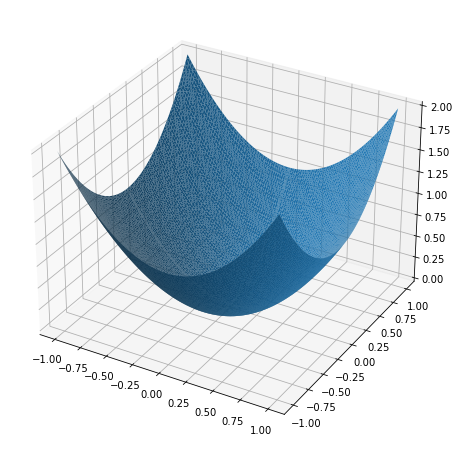

In [28]:
x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z = x**2 + y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)

# fig.savefig('chapter5_plot1.pdf')

plt.show()

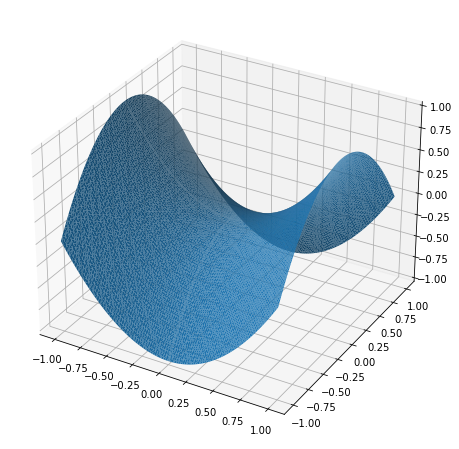

In [29]:
x = np.linspace(-1, 1, num = 100)
x = np.append(0, x.flatten())
y = np.linspace(-1, 1, num = 100)
y = np.append(0, y.flatten())

x, y = np.meshgrid(x, y)

# Compute z to make the pringle surface.
z = x**2 - y**2

fig = plt.figure(figsize = (10, 8))
ax = fig.gca(projection = '3d')
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), linewidth = 2, antialiased = True)

# fig.savefig('chapter5_plot2.pdf')

plt.show()